[![DOI](https://zenodo.org/badge/940091341.svg)](https://doi.org/10.5281/zenodo.14939868) <a href="https://www.globh2e.org.au/"><img src="https://img.shields.io/badge/ARC:Funding%20number-IC200100023-blue.svg"/></a>

# **Integrated Assessment model scenario analysis**
<!-- **<div style="text-align: left; font-size: 19px;"> Scenario analysis**</div> -->

<div style="text-align: left; font-size: 16px;">Michaël Lejeune<sup>a,b</sup>, Sami Kara<sup>a,b</sup>, Michael Zwicky Hauschild<sup>c,d</sup>, Sareh Sharabifarahni<sup>a</sup>, Rahman Daiyan<sup>b,e</sup></div><br>

<div style="text-align: left; font-size: 13px;"><sup>a</sup>Sustainability in Manufacturing and Life Cycle Engineering Research Group, School of Mechanical and Manufacturing Engineering, the University of New South Wales, 2052, Sydney, Australia</div>

<div style="text-align: left; font-size: 13px;">
<sup>b</sup>Australian Research Council Training Centre for the Global Hydrogen Economy (GlobH2e), the University of New South Wales, 2052, Sydney, Australia</div>

<div style="text-align: left; font-size: 13px;">
<sup>c</sup>Centre for Absolute Sustainability, Technical University of Denmark, Kgs, Lyngby, Denmark</div>

<div style="text-align: left; font-size: 13px;">
<sup>d</sup>Division for Quantitative Sustainability Assessment (QSA), Department of Environmental and Resource Engineering, Technical University of Denmark, Kgs, Lyngby, Denmark</div>

<div style="text-align: left; font-size: 13px;">
<sup>e</sup>School of Minerals and Energy Engineering, The University of New South Wales, Sydney 2052, Australia</div><br>

<div style="text-align: left; font-size: 13px;"> Code developer and maintainer:<a href="mailto:m.lejeune@unsw.edu.au"> Michaël Lejeune</div></a><br>


In [22]:
using CSV,DataFrames,XLSX,Statistics
using LinearAlgebra,SparseArrays
using JLD2
include("Utils/general_utils/config.jl");
include("Utils/general_utils/ssp_utils.jl");


Setting rcParams
["#f94144", "#f3722c", "#f8961e", "#f9844a", "#f9c74f", "#90be6d", "#43aa8b", "#4d908e", "#577590", "#277da1"]


In [23]:
rcParams["axes.prop_cycle"] = plt.cycler("color",["#e32f27"
                                                "#fca082"
                                                "#3787c0"]);


In [96]:
SSP1 = CSV.read(scenario_path*"SSP1-remind.csv", DataFrame)
SSP2 = CSV.read(scenario_path*"SSP2-remind.csv", DataFrame)
SSP5 = CSV.read(scenario_path*"SSP5-remind.csv", DataFrame)
SSP=vcat(SSP1, SSP2, SSP5);
years = parse.(Int, names(SSP)[findfirst(==("2020"), names(SSP)):findfirst(==("2100"), names(SSP))]);


In [ ]:
pth="../data/data_planetaryboundaries/"
SSP1 = CSV.read(pth*"SSP1.csv", DataFrame)
SSP2 = CSV.read(pth*"SSP2_19_Sus.csv", DataFrame)
SSP5 = CSV.read(pth*"SSP2_19.csv", DataFrame)


┌ Warning: thread = 3 warning: only found 5 / 20 columns around data row: 15177. Filling remaining columns with `missing`
└ @ CSV /Users/mickael/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 6 warning: only found 9 / 20 columns around data row: 3293. Filling remaining columns with `missing`
└ @ CSV /Users/mickael/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 3 warning: only found 5 / 20 columns around data row: 15178. Filling remaining columns with `missing`
└ @ CSV /Users/mickael/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 3 warning: only found 5 / 20 columns around data row: 15179. Filling remaining columns with `missing`
└ @ CSV /Users/mickael/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 3 warning: only found 5 / 20 columns around data row: 15180. Filling remaining columns with `missing`
└ @ CSV /Users/mickael/.julia/packages/CSV/cwX2w/src/file.jl:586
┌ Warning: thread = 3 warning: only found 5 / 20 columns around da

Row,Model,Scenario,Region,Variable,Unit,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050,2060,2070,2080,2090,2100
,String7,String7,String7,String,String31,String31?,String31?,String31?,String31?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,IMAGE,SSP2_19,BRA,Agricultural Demand,million t DM/yr,288.58340625,383.94190625,477.12881250000004,528.965625,530.644,544.194,649.381,710.332,726.96,742.288,774.85,796.474,790.31,745.044,715.164
2,IMAGE,SSP2_19,CAN,Agricultural Demand,million t DM/yr,38.29421875,40.44416015625,53.4965703125,51.53180859375,58.7442,77.7512,98.6428,100.779,98.3809,99.6997,116.647,151.774,150.82,160.38,163.806
3,IMAGE,SSP2_19,CEU,Agricultural Demand,million t DM/yr,98.2264921875,93.1038984375,108.403203125,111.8488984375,115.667,118.608,120.144,119.916,118.51,117.444,117.88,122.266,116.243,111.103,109.57
4,IMAGE,SSP2_19,CHN,Agricultural Demand,million t DM/yr,712.198375,851.980875,916.566375,995.065375,1055.17,1189.18,1263.03,1251.14,1203.79,1178.28,1122.88,1124.25,1053.07,983.85,935.291
5,IMAGE,SSP2_19,EAF,Agricultural Demand,million t DM/yr,65.6745234375,79.71096875,95.504546875,108.325703125,137.45,165.117,215.873,346.826,416.853,444.348,460.58,494.782,493.507,490.195,497.088
6,IMAGE,SSP2_19,INDIA,Agricultural Demand,million t DM/yr,411.8036875,478.1273125,507.1013125,559.576375,656.306,736.169,840.312,869.808,882.652,913.591,927.988,923.901,927.91,902.212,888.774
7,IMAGE,SSP2_19,INDO,Agricultural Demand,million t DM/yr,153.034703125,187.04159375,226.7215,250.7545,277.258,323.731,364.691,384.76,384.948,382.845,399.418,414.457,417.424,419.046,414.466
8,IMAGE,SSP2_19,JAP,Agricultural Demand,million t DM/yr,49.851359375,48.21858984375,48.637089843750005,48.45298046875,48.0829,47.6499,46.4388,45.2347,43.727,42.2432,38.7356,35.1621,32.0171,29.1961,26.8306
9,IMAGE,SSP2_19,KOR,Agricultural Demand,million t DM/yr,33.92001953125,32.76366015625,35.56548046875,36.2075,36.5998,36.9282,36.5745,37.4704,35.1202,34.0457,31.8111,29.3313,26.6306,24.2201,22.3687


In [51]:
SSP=vcat(SSP1, SSP2, SSP5);
years = parse.(Int, names(SSP)[findfirst(==("2020"), names(SSP)):findfirst(==("2100"), names(SSP))]);


In [42]:
se=get_vals("Secondary Energy")|> Matrix
se_f = [ isa(x, AbstractString) ? parse(Float64, x) :
         isa(x, Number)         ? Float64(x)       :
         missing
       for x in se ]
se_f = reshape(se_f, size(se))
se_f[:,1:6]


3×6 Matrix{Float64}:
 9.24961  11.1651   13.4619  15.9392  18.3138  20.0606
 9.25277   9.77927  11.2593  12.6678  13.9742  14.9465
 9.25277   9.58309  10.7279  11.714   12.4528  13.3523

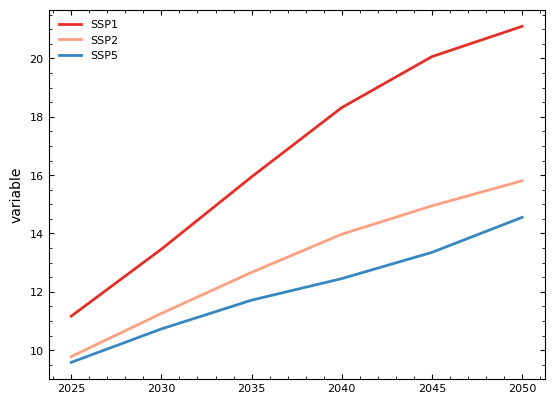

In [49]:
plot_var(Matrix(se_f[:,2:7]'))


In [98]:
SEH2=get_vals("SE|Hydrogen",show=false);
EJ_kWh= 1/3.6e-12 #kWh/EJ
LHVH2=33.33 # kWh/kgH2
EJH2_to_kgH2=EJ_kWh/LHVH2 # kWh/EJ * kgH2/kWh = kgH2/EJ

SEH2=get_vals("SE|Hydrogen") #EJ
TotalkgH2=SEH2.*EJH2_to_kgH2 # EJ * kgH2/EJ = kgH2

TotalMtH2=TotalkgH2.*1e-9 # mass H2 to MtH2
TotalGtH2=TotalkgH2.*1e-12 # mass H2 to GtH2
;


## ***3.2 Constraints***

### ***3.2.1. Electricity***

Here we can check the efficiency the models expect for water electrolysis. But this cannot be implemented easily. We rather focus on efficiency gains which can be adapted to our case study. 

In [99]:
Matrix(get_vals("SE|Input|Electricity|Hydrogen").*EJ_kWh)./(get_vals("SE|Hydrogen|+|Electricity").*EJH2_to_kgH2)


Row,2025,2030,2035,2040,2045,2050
,Float64,Float64,Float64,Float64,Float64,Float64
1,52.9048,51.2769,49.7463,48.3043,46.9437,45.6575
2,52.9048,51.2769,49.7463,48.3043,46.9437,45.6575
3,52.9048,51.2769,49.7463,48.3043,46.9437,45.6575


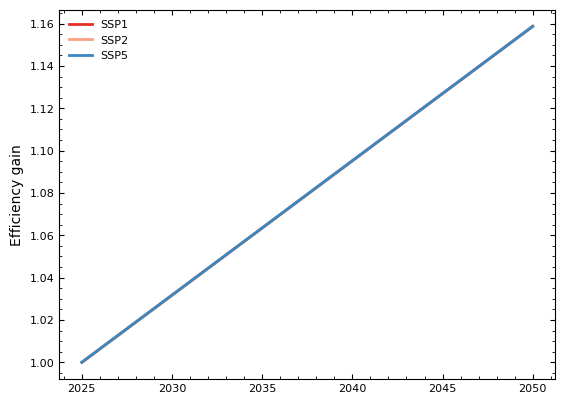

In [100]:
𝛈_electrolysis_raw=get_vals("Tech|Hydrogen|Electricity|Efficiency")
𝛈_electrolysis=Matrix((𝛈_electrolysis_raw./𝛈_electrolysis_raw[:,1]))
plot_var(Matrix(𝛈_electrolysis'),label="Efficiency gain")


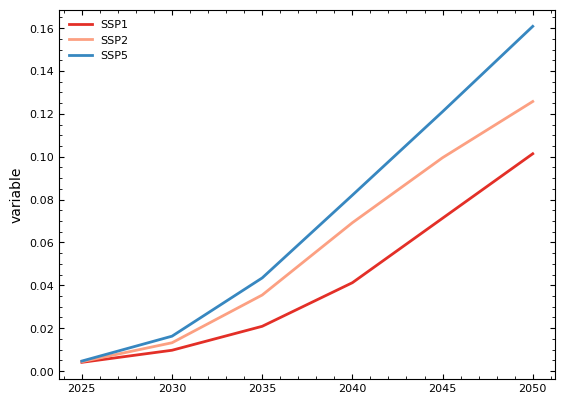

In [101]:
share=get_vals("SE|Hydrogen")./get_vals("SE")
plot_var(share)


In [102]:
c_biomass_electricity= Matrix(get_vals("SE|Electricity|+|Biomass").*EJ_kWh./TotalkgH2.*share)'
c_gas_electricity= Matrix(get_vals("SE|Electricity|+|Gas").*EJ_kWh./TotalkgH2.*share)'
c_gas_electricity_CC = Matrix(get_vals("SE|Electricity|Gas|+|w/ CC").*EJ_kWh./TotalkgH2.*share)'
c_gas_electricity_noCC = Matrix(get_vals("SE|Electricity|Gas|+|w/o CC").*EJ_kWh./TotalkgH2.*share)'
c_coal_electricity= Matrix(get_vals("SE|Electricity|+|Coal").*EJ_kWh./TotalkgH2.*share)'
c_oil_electricity = Matrix(get_vals("SE|Electricity|Oil|w/o CC").*EJ_kWh./TotalkgH2.*share)'
c_geothermal_electricity= Matrix(get_vals("SE|Electricity|+|Geothermal").*EJ_kWh./TotalkgH2.*share)'
c_hydro_electricity= Matrix(get_vals("SE|Electricity|+|Hydro").*EJ_kWh./TotalkgH2.*share)'
c_nuclear_electricity= Matrix(get_vals("SE|Electricity|+|Nuclear").*EJ_kWh./TotalkgH2.*share)'
c_wind_electricity= Matrix(get_vals("SE|Electricity|+|Wind").*EJ_kWh./TotalkgH2.*share)'
c_solar_electricity= Matrix(get_vals("SE|Electricity|+|Solar").*EJ_kWh./TotalkgH2.*share)'
c_solar_PV_electricity= Matrix(get_vals("SE|Electricity|Solar|+|PV").*EJ_kWh./TotalkgH2.*share)'
c_CSP_electricity = Matrix(get_vals("SE|Electricity|Solar|+|CSP").*EJ_kWh./TotalkgH2.*share)'
;


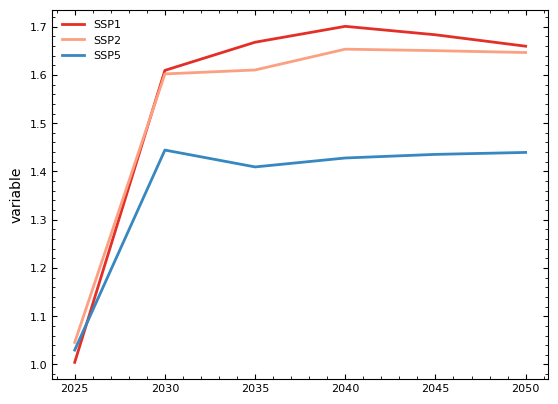

In [105]:
r_solar_wind=(c_solar_electricity./c_wind_electricity)
plot_var(r_solar_wind)


### ***3.1.1. electrolysis technology ratios***

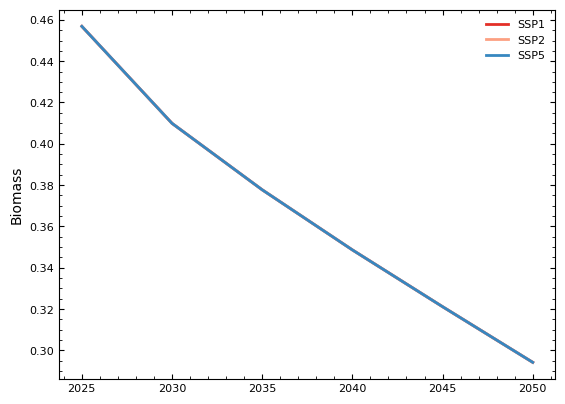

In [106]:
plot_var(C_AEC, label="Biomass")


In [52]:
C_AEC= [0.456858911	0.409911702	0.377745893	0.348652174	0.321172296	0.294236939
        0.456858911	0.409911702	0.377745893	0.348652174	0.321172296	0.294236939
        0.456858911	0.409911702	0.377745893	0.348652174	0.321172296	0.294236939]'|>Matrix;


In [53]:
C_PEM=[0.482496124	0.519686209	0.544879587	0.565652714	0.584064837	0.601662915
        0.482496124	0.519686209	0.544879587	0.565652714	0.584064837	0.601662915
        0.482496124	0.519686209	0.544879587	0.565652714	0.584064837	0.601662915]'|>Matrix;



In [54]:
C_SOEC=[0.060644965	0.070402088	0.077374519	0.085695112	0.094762867	0.104100147
        0.060644965	0.070402088	0.077374519	0.085695112	0.094762867	0.104100147
        0.060644965	0.070402088	0.077374519	0.085695112	0.094762867	0.104100147]'|>Matrix;



### ***3.1.3. Hydrogen production***

In [55]:
c_gas= Matrix(get_vals("SE|Hydrogen|Gas|+|w/o CC").*EJH2_to_kgH2./TotalkgH2)'|>Matrix
c_gasccs= Matrix(get_vals("SE|Hydrogen|Gas|+|w/ CC").*EJH2_to_kgH2./TotalkgH2)'|>Matrix
c_biomass= Matrix(get_vals("SE|Hydrogen|Biomass|+|w/o CC").*EJH2_to_kgH2./TotalkgH2)'|>Matrix
c_biomassccs= Matrix(get_vals("SE|Hydrogen|Biomass|+|w/ CC").*EJH2_to_kgH2./TotalkgH2)'|>Matrix
c_coal= Matrix(get_vals("SE|Hydrogen|Coal|+|w/o CC").*EJH2_to_kgH2./TotalkgH2)'|>Matrix
c_coalccs= Matrix(get_vals("SE|Hydrogen|Coal|+|w/ CC").*EJH2_to_kgH2./TotalkgH2)'|>Matrix
c_electrolysis= Matrix(get_vals("SE|Hydrogen|+|Electricity").*EJH2_to_kgH2./TotalkgH2)'|>Matrix


BoundsError: BoundsError: attempt to access 1×0 Matrix{String15} at index [2]

# Export to a JLD file

In [113]:
constraintsPath=mkpath(respath*"constraints")


"../results/constraints"

In [114]:
@save constraintsPath*"/constraints_elec.jld" c_biomass_electricity c_gas_electricity c_gas_electricity_CC c_gas_electricity_noCC c_coal_electricity c_oil_electricity c_geothermal_electricity c_hydro_electricity c_nuclear_electricity c_wind_electricity c_solar_electricity c_solar_PV_electricity c_CSP_electricity

@save constraintsPath*"/constraints_h2.jld" c_biomass c_biomassccs c_gas c_gasccs c_coal c_coalccs c_electrolysis C_AEC C_PEM C_SOEC


## **2.2. Critical analysis using REMIND SSPx-PkBudg500 scenarios**
Here we perform a few preparatory calculations for hydrogen electrolysis efficiency and total hydrogen production:

1. We load the raw electricity‐to‐hydrogen conversion efficiencies (`η_electrolysis_raw`) from our data and normalize each column by its first value.  This gives us a matrix of relative efficiencies (`η_electrolysis`) for each scenario/time step.

2. We then retrieve the total hydrogen energy supply (`SEH2`) in exajoules (EJ).  

3. Using the fact that 1 EJ = 1/(3.6 × 10⁻¹²) kWh and the lower heating value of hydrogen (33.33 kWh/kg), we compute a conversion factor from EJ to kg of H₂ (`EJH2_to_kgH2`).

4. Multiplying the energy supply (EJ) by this factor gives the total hydrogen mass in kilograms (`TotalkgH2`).  

5. Finally, we express that mass in million tonnes (`TotalMtH2 = kg × 10⁻⁹`) and in billion tonnes (`TotalGtH2 = kg × 10⁻¹²`) for easy reporting.

In [ ]:
# MWh_H2=get_vals("SE|Hydrogen").*(1/3.6e-9) #MWh/yr
# cf=0.6 # assumed capacity factor
# ((MWh_H2./(8760*cf))./1000)
# GW_Cap=((MWh_H2./(8760*cf))./1000)|> Matrix #capacity in GW
# ;
